# Numerical Methods 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Analytical solution for $f(x) = x^2 - x - 2$

We solve the equation:

$$
x^2 - x - 2 = 0
$$

---

## Method 1: Factoring
We look for two numbers whose product is $-2$ and sum is $-1$: $-2$ and $+1$.

$$
x^2 - x - 2 = (x - 2)(x + 1) = 0
$$

So the roots are:

$$
x = 2 \quad \text{or} \quad x = -1
$$

---

## Method 2: Quadratic formula
For $ax^2 + bx + c = 0$ with $a=1,\; b=-1,\; c=-2$:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
= \frac{1 \pm \sqrt{(-1)^2 - 4(1)(-2)}}{2}
= \frac{1 \pm \sqrt{1 + 8}}{2}
= \frac{1 \pm 3}{2}
$$

Thus:

$$
x = 2 \quad \text{or} \quad x = -1
$$

---

## Extra (shape/vertex)
- Discriminant: $\Delta = b^2 - 4ac = 9 > 0$ ⇒ two distinct real roots.  
- Vertex: $x = \tfrac{-b}{2a} = \tfrac{1}{2}$, with minimum value $f(0.5) = -\tfrac{9}{4}$.  
- Intercepts: $x = -1,\, 2$, and $y$-intercept at $f(0) = -2$.

---

# Newton-Raphson Method

**Idea:** Use the tangent line at $x_n$ to approximate the root.

- Taylor expansion around $x_n$:  
$$
f(x) \approx f(x_n) + f'(x_n)(x - x_n)
$$
- Solve for root of linear approximation:  
$$
0 = f(x_n) + f'(x_n)(x_{n+1} - x_n) \implies x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

**Convergence:** Quadratic if $x_0$ is close to the root.  

**Limitations:**
- Fails if $f'(x_n) \approx 0$.  
- Divergence possible if guess is far from root.

In [25]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=500):
    x = x0
    for i in range(max_iter):
        x_new = x - f(x)/df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

In [26]:
# Example
f = lambda x: x**2 - x - 2
df = lambda x: 2*x - 1

root = newton_raphson(f, df, x0=1.5)
print("Root (Newton-Raphson):", root)

Root (Newton-Raphson): 2.0


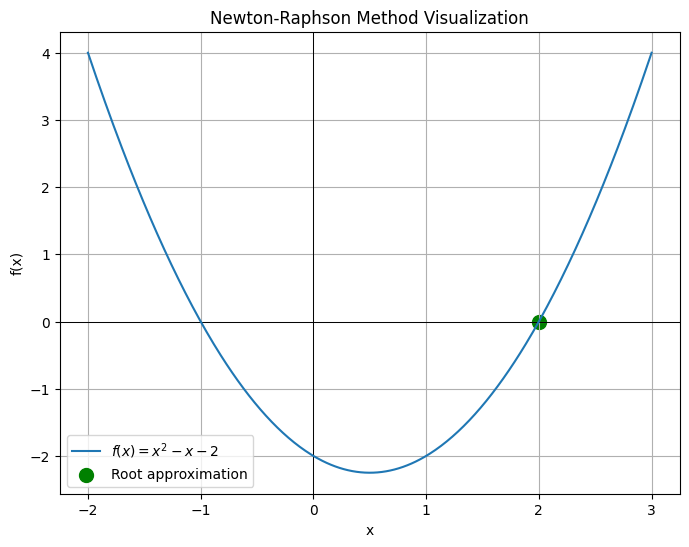

In [27]:
# Plot the function
x_vals = np.linspace(-2, 3, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8, 6))
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.plot(x_vals, y_vals, label='$f(x) = x^2 - x - 2$')

# Highlight the root
plt.scatter(root, f(root), color='green', s=100, label='Root approximation')
plt.title("Newton-Raphson Method Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
import matplotlib.animation as animation
from IPython.display import HTML

In [29]:
# Newton-Raphson with history
def newton_raphson_with_history(f, df, x0, tol=1e-8, max_iter=100):
    x = x0
    history = [x0]
    for i in range(max_iter):
        if df(x) == 0:
            break
        x_new = x - f(x)/df(x)
        history.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return history

In [30]:
# Starting point
x0 = 1.0
history = newton_raphson_with_history(f, df, x0)

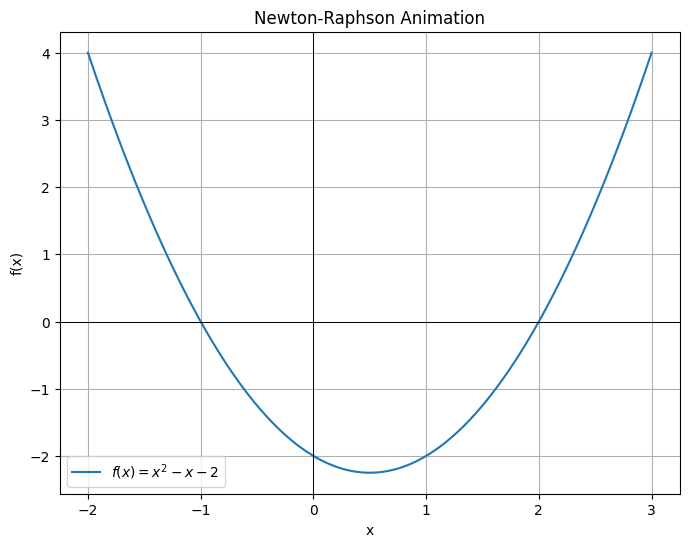

In [31]:
# Plot setup
x_vals = np.linspace(-2, 3, 400)
y_vals = f(x_vals)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x_vals, y_vals, label='$f(x) = x^2 - x - 2$')
ax.axhline(0, color='black', linewidth=0.7)
ax.axvline(0, color='black', linewidth=0.7)
ax.set_title("Newton-Raphson Animation")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.legend()
ax.grid(True)

# Artists for animation
point, = ax.plot([], [], 'ro')
step_line, = ax.plot([], [], 'ko--', alpha=0.7)
tangent_line, = ax.plot([], [], 'r--', alpha=0.7)

def init():
    point.set_data([], [])
    step_line.set_data([], [])
    tangent_line.set_data([], [])
    return point, step_line, tangent_line

def animate(i):
    if i >= len(history)-1:
        return point, step_line, tangent_line
    
    x_curr = history[i]
    y_curr = f(x_curr)
    slope = df(x_curr)
    tangent = slope * (x_vals - x_curr) + y_curr
    
    # Update current tangent line only
    tangent_line.set_data(x_vals, tangent)
    
    # Update step line to next iteration
    step_line.set_data([x_curr, history[i+1]], [y_curr, 0])
    
    # Update current point
    point.set_data([x_curr], [y_curr])
    
    return point, step_line, tangent_line

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=len(history), interval=1000,
                              blit=True, repeat=False)

plt.show()

In [24]:
# Render animation as HTML5 video so it shows in notebook
html_video = ani.to_jshtml()
HTML(html_video)